<a href="https://colab.research.google.com/github/shukla7721/RainWaterHarvesting/blob/main/model_rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter your date in format d-m-y : 21-02-2030
Predicted rainfall on 21-02-2030: 275.33


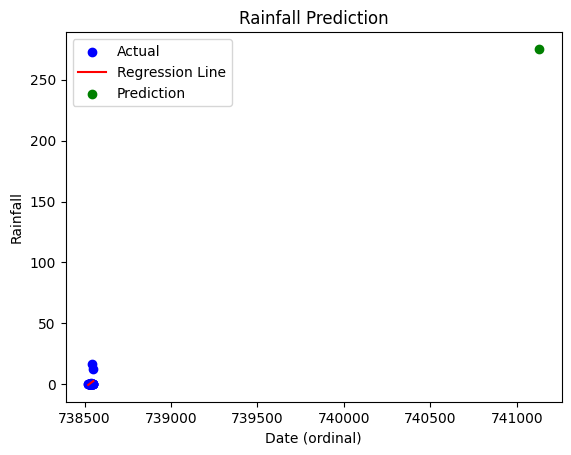

In [9]:
#####for the month of january

import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Use the raw link to the CSV file on GitHub
df = pd.read_csv(r"https://raw.githubusercontent.com/shukla7721/RainWaterHarvesting/refs/heads/main/jan.csv").head(31)

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['date_num'] = df['date'].map(lambda x: x.toordinal())
v = input("Enter your date in format d-m-y : ")
s = pd.to_datetime(v, format='%d-%m-%Y')
s_num = s.toordinal()

#print(df_2023.to_string())
reg=linear_model.LinearRegression()
reg.fit(df[['date_num']],df['P_rain'])
value = reg.predict(pd.DataFrame([[s_num]], columns=['date_num']))
print(f"Predicted rainfall on {v}: {value[0]:.2f}")


plt.scatter(df['date_num'], df['P_rain'], color='blue', label='Actual')
plt.plot(df['date_num'], reg.predict(df[['date_num']]), color='red', label='Regression Line')
plt.scatter(s_num, value, color='green', label='Prediction')
plt.legend()
plt.xlabel('Date (ordinal)')
plt.ylabel('Rainfall')
plt.title('Rainfall Prediction')
plt.show()

Predicted rainfall on 21-01-2026 using Decision Tree: 0.00


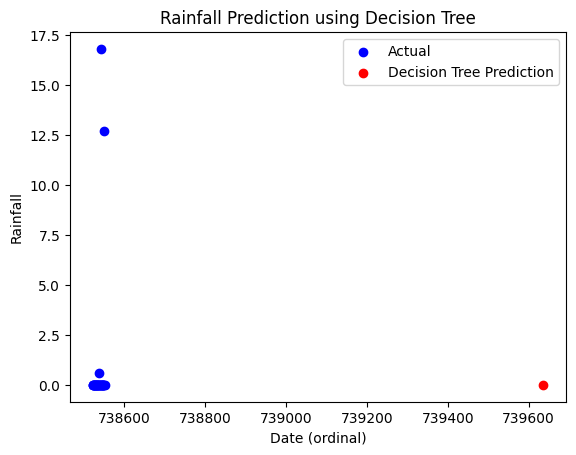

In [8]:
###############This method to be used for months with heavy rainfall



from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df[['date_num']], df['P_rain'])
value_tree = tree_reg.predict(pd.DataFrame([[s_num]], columns=['date_num']))

print(f"Predicted rainfall on {v} using Decision Tree: {value_tree[0]:.2f}")

plt.scatter(df['date_num'], df['P_rain'], color='blue', label='Actual')
plt.scatter(s_num, value_tree, color='red', label='Decision Tree Prediction')
plt.xlabel('Date (ordinal)')
plt.ylabel('Rainfall')
plt.title('Rainfall Prediction using Decision Tree')
plt.legend()
plt.show()